In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from nltk import word_tokenize
import string
import re

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv('dataset3.csv')
df = df.sample(frac = 1)
df

,Feature,Boolean
19242,<=tbody> = What do we dread more than the end ...,0.0
19047,<http://panela.envmails.com/ltrack?g=1&id=NklW...,0.0
17896,Do send me also the account details and I wil...,0.0
7953,quoted-printable'. 'ahhpzxypoukbgqbifhcgwgrndr...,1.0
8051,We recently have determined that different com...,1.0
...,...,...
786,Notification of Limited Account Access As part...,1.0
22500,"quoted-printable'. ""=20 =20 =20\r\n =20\r\n = ...",0.0
21158,quoted-printable'. 'Your detailed life predict...,0.0
13990,base64'. None). ('text/html'. 'quoted-printabl...,0.0


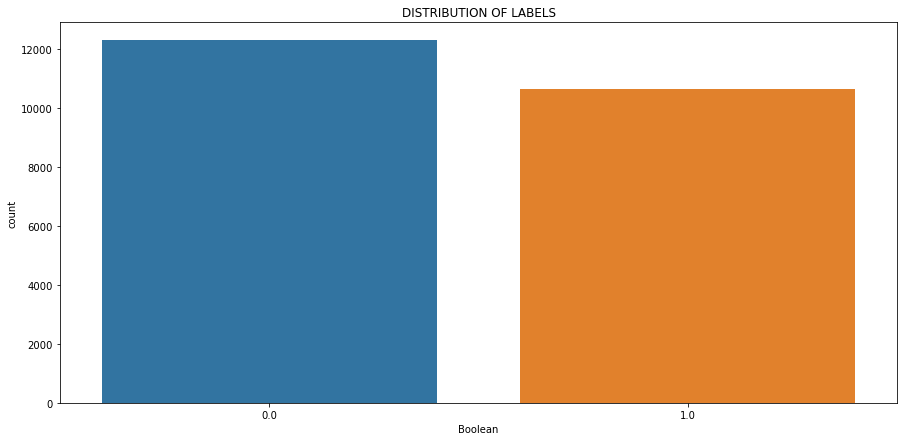

In [3]:
# Let's visualize the Label distiributions using seaborn
plt.figure(figsize=(15,7))
sns.countplot(x='Boolean',data=df)
plt.title("DISTRIBUTION OF LABELS")
plt.show()

In [4]:
def clean_text(sentence):
    '''
        function to clean content column, make it ready for transformation and modeling
    '''
    #  print(type(sentence))
    sentence = sentence.lower()                #convert text to lower-case
    sentence = re.sub('â€˜','',sentence)    # remove the text â€˜ which appears to occur flequently
    sentence = re.sub('[‘’“”…,]', '', sentence) # remove punctuation
    sentence = re.sub('_', '', sentence) # remove underscore
    sentence = re.sub('[()]', '', sentence)  #remove parentheses
    #sentence = re.sub("[^a-zA-Z]"," ",sentence) #remove numbers and keep text/alphabet only
    sentence = word_tokenize(sentence)      # remove repeated characters (tanzaniaaaaaaaa to tanzania)

    return ' '.join(sentence)


In [5]:
# Applying our clean_text function on contents
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/nitk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
df['Feature'] = df['Feature'].apply(lambda x: str(x))
df['Boolean'] = df['Boolean'].apply(lambda x: str(x))
df['Feature'] = df['Feature'].apply(clean_text)
df.head()

,Feature,Boolean
19242,< =tbody > = what do we dread more than the en...,0.0
19047,< http : //panela.envmails.com/ltrack ? g=1 & ...,0.0
17896,do send me also the account details and i will...,0.0
7953,quoted-printable ' . 'ahhpzxypoukbgqbifhcgwgrn...,1.0
8051,we recently have determined that different com...,1.0


In [7]:
df['Feature'] = df['Feature'].apply(lambda x: str(x))
df['Boolean'] = df['Boolean'].apply(lambda x: str(x))

In [8]:
df = df[['Feature', 'Boolean']]
SEED = 2020
df_train = df.sample(frac=0.75, random_state=SEED)
df_test = df.drop(df_train.index)
len(df_train), len(df_test)

(17195, 5732)

In [9]:
import ktrain
from ktrain import text

# selecting transformer to use
MODEL_NAME = 'bert-base-uncased'

# Common parameters
MAXLEN  = 128
batch_size = 32
learning_rate = 5e-5
epochs = 10

In [10]:
t = text.Transformer(MODEL_NAME, maxlen = MAXLEN)
trn = t.preprocess_train(df_train.Feature.values, df_train.Boolean.values)
val = t.preprocess_test(df_test.Feature.values, df_test.Boolean.values)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=batch_size)
history = learner.fit(learning_rate, epochs)

preprocessing train...
language: en
train sequence lengths:
	mean : 324
	95percentile : 1084
	99percentile : 2303


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 332
	95percentile : 1129
	99percentile : 2474


Epoch 1/10
538/538 [==============================] - 2679s 5s/step - loss: 0.0787 - accuracy: 0.9734 - val_loss: 0.0309 - val_accuracy: 0.9899
Epoch 2/10
538/538 [==============================] - 2650s 5s/step - loss: 0.0359 - accuracy: 0.9866 - val_loss: 0.0337 - val_accuracy: 0.9881
Epoch 3/10
538/538 [==============================] - 2647s 5s/step - loss: 0.0302 - accuracy: 0.9881 - val_loss: 0.0320 - val_accuracy: 0.9904
Epoch 4/10
538/538 [==============================] - 2649s 5s/step - loss: 0.0325 - accuracy: 0.9882 - val_loss: 0.0264 - val_accuracy: 0.9921
Epoch 5/10
538/538 [==============================] - 2652s 5s/step - loss: 0.0264 - accuracy: 0.9897 - val_loss: 0.0245 - val_accuracy: 0.9916
Epoch 6/10
538/538 [==============================] - 2650s 5s/step - loss: 0.0261 - accuracy: 0.9896 - val_loss: 0.0247 - val_accuracy: 0.9913
Epoch 7/10
538/538 [==============================] - 2647s 5s/step - loss: 0.0290 - accuracy: 0.9888 - val_loss: 0.0286 - val_accuracy:

In [11]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

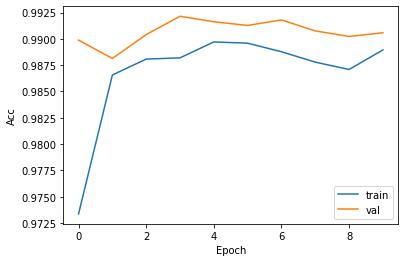

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

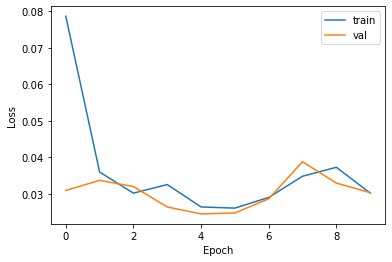

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

In [14]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109,484,547
Trainable params: 109,484,547
Non-trainable params: 0
_________________________________________________________________


In [16]:
learner.validate(val_data=val)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3107
           1       1.00      0.98      0.99      2625

    accuracy                           0.99      5732
   macro avg       0.99      0.99      0.99      5732
weighted avg       0.99      0.99      0.99      5732



array([[3101,    6],
       [  48, 2577]])

In [17]:
classifier = ktrain.get_predictor(learner.model, t)

In [18]:
classifier.save('model/MODEL3')